#Import Library

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

# Data Visualistion
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
import statsmodels.api as sm
from scipy import stats

# Modelling 
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

## Tablulating the Results
from tabulate import tabulate

##Remove Unnecessary warning
import warnings
warnings.filterwarnings('ignore')



#Importing data

In [2]:
# Fetching dataset
dataset = pd.read_csv('C:/Users/admin/Downloads/Car ML Prediction\car_price_prediction.csv')

## Looking at sample data
dataset.head(10)



,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [3]:
## Shape of the data set  There are 18 columns and 19237 rows
dataset.shape

(19237, 18)

#Exploratory Analysis

In [4]:
# Data type, Missing data , Summary statistic
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
### Modifying the datatypes of the columns to category

dataset.Manufacturer = dataset.Manufacturer.astype('category')
dataset.Model = dataset.Model.astype('category')
dataset.Category = dataset.Category.astype('category')
dataset["Leather interior"] = dataset["Leather interior"].astype('category')
dataset["Fuel type"] = dataset["Fuel type"].astype('category')
dataset["Gear box type"] = dataset["Gear box type"].astype('category')
dataset["Drive wheels"] = dataset["Drive wheels"].astype('category')
dataset.Doors = dataset.Doors.astype('category')
dataset.Wheel = dataset.Wheel.astype('category')
dataset.Color = dataset.Color.astype('category')

In [6]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                19237 non-null  int64   
 1   Price             19237 non-null  int64   
 2   Levy              19237 non-null  object  
 3   Manufacturer      19237 non-null  category
 4   Model             19237 non-null  category
 5   Prod. year        19237 non-null  int64   
 6   Category          19237 non-null  category
 7   Leather interior  19237 non-null  category
 8   Fuel type         19237 non-null  category
 9   Engine volume     19237 non-null  object  
 10  Mileage           19237 non-null  object  
 11  Cylinders         19237 non-null  float64 
 12  Gear box type     19237 non-null  category
 13  Drive wheels      19237 non-null  category
 14  Doors             19237 non-null  category
 15  Wheel             19237 non-null  category
 16  Color             1923

In [7]:
### Missing values (-) in the dataset

print('Missing values in the dataset:\n')
for each_column in dataset.columns:
    print('Column: {} - {}'.format(each_column, list(dataset[each_column]).count('-')))

Missing values in the dataset:

Column: ID - 0
Column: Price - 0
Column: Levy - 5819
Column: Manufacturer - 0
Column: Model - 0
Column: Prod. year - 0
Column: Category - 0
Column: Leather interior - 0
Column: Fuel type - 0
Column: Engine volume - 0
Column: Mileage - 0
Column: Cylinders - 0
Column: Gear box type - 0
Column: Drive wheels - 0
Column: Doors - 0
Column: Wheel - 0
Column: Color - 0
Column: Airbags - 0


In [8]:
### Replacing the '-' to NA's in the column - Levy

dataset['Levy'] = [np.nan if value == '-' else float(value) for value in dataset['Levy']]
dataset['Levy'].isnull().sum()

5819

<AxesSubplot: >

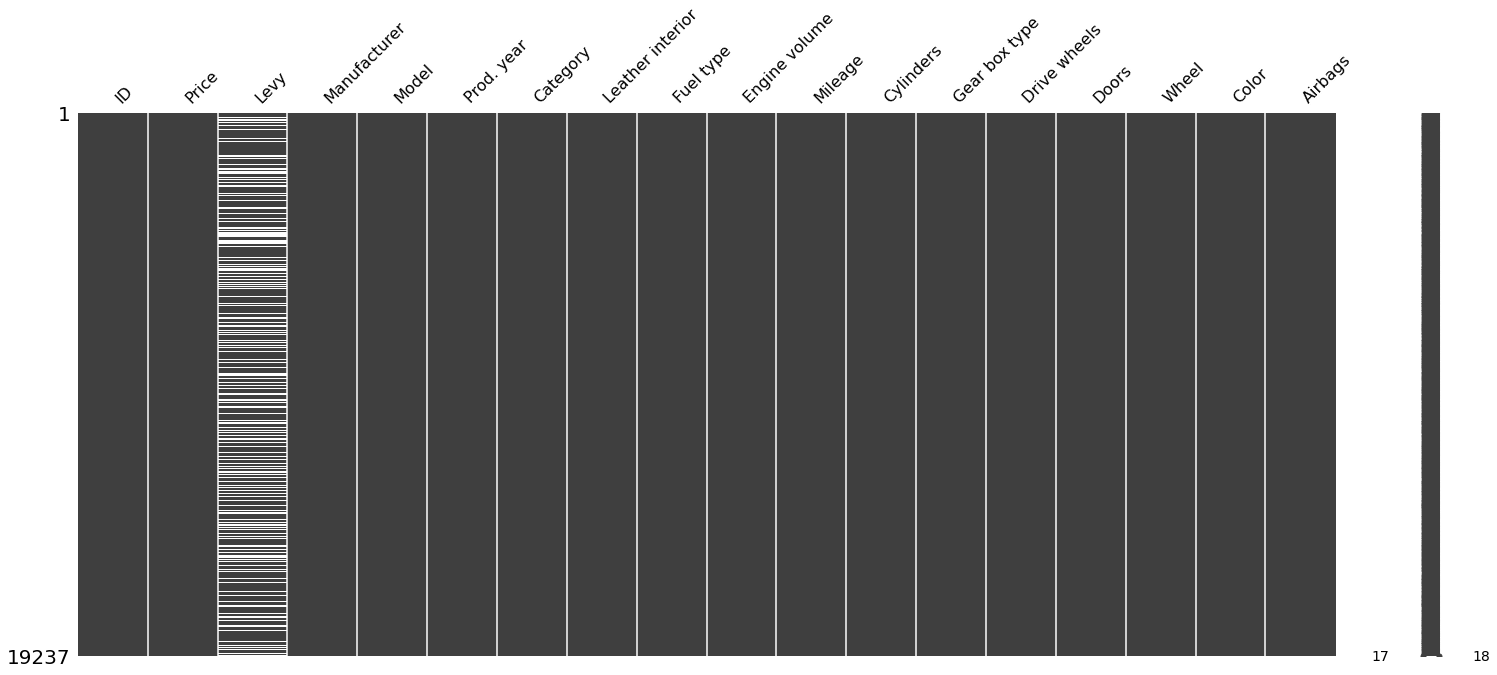

In [9]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

In [10]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,ID,Price,Levy,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,461.867051,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,16.000000,16.000000


#Feature  Analysis 
##Categorical variable - category

In [11]:
# Value counts o f the column - Category

category_count = dataset['Category'].value_counts(dropna = False)
category_count

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

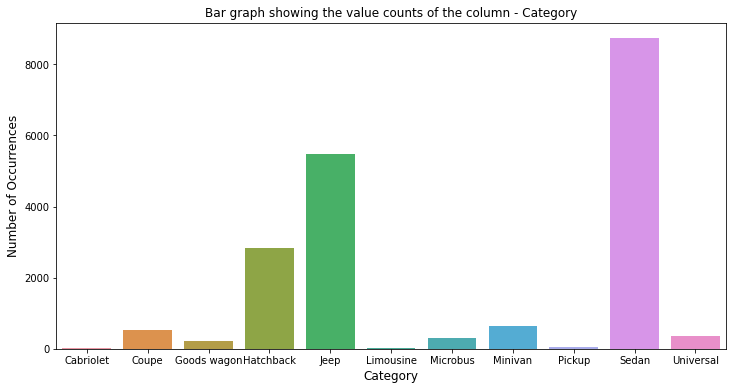

In [12]:
## Bar graph showing the value counts of the column

plt.figure(figsize = (12, 6))
# sns.barplot( category_count.index, category_count.values, alpha = 0.8)
sns.countplot(data=dataset, x='Category')
plt.title('Bar graph showing the value counts of the column - Category')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()


#We see that the data for predicting Cabriolet, Limousine, Pickup, Good wagon, Microbus, Universal, Coupe, Minivan are to less and it not sufficient data for categorie

In [13]:
### Mean price per each category
mean_price_category = dataset[['Category','Price']].groupby('Category', as_index = False).mean()
mean_price_category

,Category,Price
0,Cabriolet,24583.694444
1,Coupe,21250.406015
2,Goods wagon,122916.180258
3,Hatchback,11381.245873
4,Jeep,23684.285949
5,Limousine,11534.454545
6,Microbus,18550.928105
7,Minivan,20531.221020
8,Pickup,28805.269231
9,Sedan,14231.545902


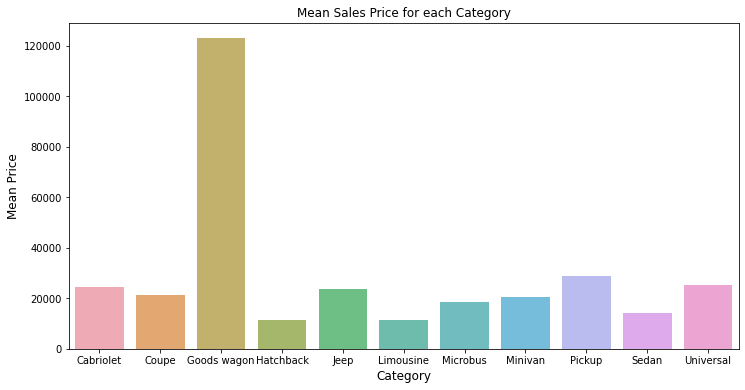

In [14]:
#Mean price for each category

plt.figure(figsize = (12,6))
sns.barplot(data=dataset,x=mean_price_category['Category'],y=mean_price_category['Price'],alpha = 0.8)
plt.title('Mean Sales Price for each Category')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Category', fontsize = 12)
plt.show()

#### Following the grahp, we can see that the mean price for Goods wagon is highest than other all the rest are not much different. But, due to the limited of data we have to modify the column to get better information

In [15]:
# Categorical vaiable - Leather interior
interior_count = dataset['Leather interior'].value_counts(dropna=False)
interior_count

Yes    13954
No      5283
Name: Leather interior, dtype: int64

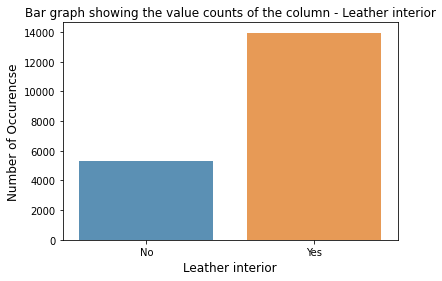

In [16]:
### Bar graph showing the value counts of the column - leather interior

sns.barplot(data=dataset,x=interior_count.index, y=interior_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Leather interior')
plt.ylabel('Number of Occurencse', fontsize= 12)
plt.xlabel('Leather interior', fontsize= 12)
plt.show()

##### Most car have a leather interior

In [17]:
### Mean price per each leather interior
mean_price_interior = dataset[['Leather interior','Price']].groupby('Leather interior',as_index=False).mean()
mean_price_interior

,Leather interior,Price
0,No,18322.323301
1,Yes,18644.369930


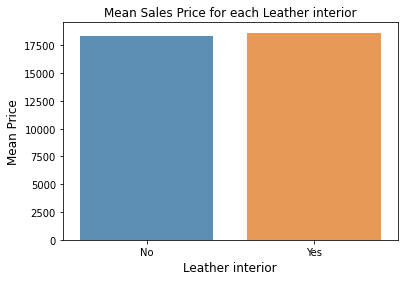

In [18]:
### Mean Price for each Leather interior

sns.barplot(data=dataset,x=mean_price_interior['Leather interior'], y=mean_price_interior['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Leather interior')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Leather interior', fontsize = 12)
plt.show()

##### The mean price in both type of car those got interior or not are nearly the same

In [19]:
# Categorical variable Fuel type
fuel_count = dataset['Fuel type'].value_counts(dropna=False)
fuel_count

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

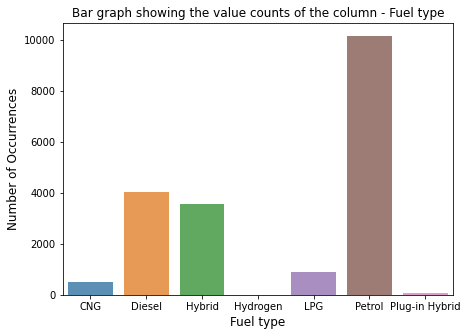

In [20]:
### Bar grahp showing the value counts of the column - Fuel type
plt.figure(figsize=(7,5))
sns.barplot(data=dataset,x=fuel_count.index, y=fuel_count.values, alpha= 0.8)
plt.title('Bar graph showing the value counts of the column - Fuel type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

##### We can see that there is not sufficient data for Hydrogen and Plug-in Hybrid

In [21]:
### Mean price per each Fuel type

mean_price_fuel = dataset[['Fuel type', 'Price']].groupby('Fuel type', as_index = False).mean()
mean_price_fuel

,Fuel type,Price
0,CNG,8509.591093
1,Diesel,30631.071358
2,Hybrid,10849.320570
3,Hydrogen,20385.000000
4,LPG,13309.438341
5,Petrol,17377.351527
6,Plug-in Hybrid,23700.453488


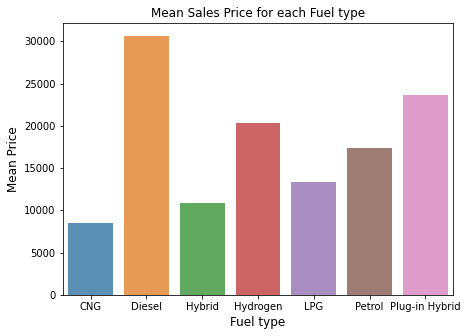

In [22]:
### Mean Price for each Fuel type

plt.figure(figsize = (7, 5))
sns.barplot(data=dataset,x=mean_price_fuel['Fuel type'], y=mean_price_fuel['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Fuel type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Fuel type', fontsize = 12)
plt.show()

#### All mean for each type are different

####  3.2.4 Categorical variable - Gear box type

In [23]:

### Value counts of the column - Gear box type

gear_count = dataset['Gear box type'].value_counts(dropna = False)
gear_count

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

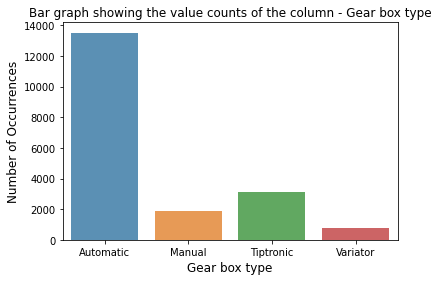

In [24]:
### Bar graph showing the value counts of the column - Gear box type

sns.barplot(data=dataset,x=gear_count.index, y=gear_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Gear box type')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

##### The most of car are automatic gear box type

In [25]:
### Mean price per each Gear box type

mean_price_gear = dataset[['Gear box type', 'Price']].groupby('Gear box type', as_index = False).mean()
mean_price_gear

,Gear box type,Price
0,Automatic,15974.326032
1,Manual,25614.896533
2,Tiptronic,26448.307221
3,Variator,14762.399464


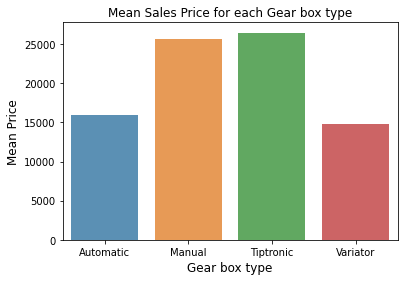

In [26]:
### Mean Price for each Gear box type

sns.barplot(data=dataset, x=mean_price_gear['Gear box type'], y=mean_price_gear['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Gear box type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Gear box type', fontsize = 12)
plt.show()

##### Manual and tiptronic seems to have the same price. Similarly, as well as Automatic and Variator

#### 3.2.5 Categorical variable - Drive wheels

In [27]:
### Value counts of the column - Drive wheels

drive_count = dataset['Drive wheels'].value_counts(dropna = False)
drive_count

Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

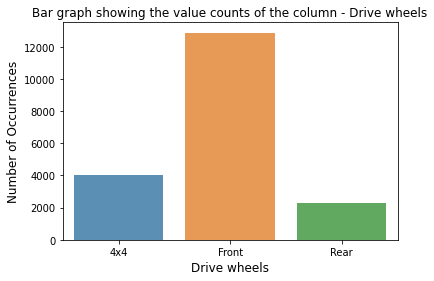

In [28]:
### Bar graph showing the value counts of the column - Drive wheels

sns.barplot(data=dataset, x=drive_count.index, y=drive_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Drive wheels')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

##### Most of the cars have front drive wheel

In [29]:
### Mean price per each Drive wheels

mean_price_drive = dataset[['Drive wheels', 'Price']].groupby('Drive wheels', as_index = False).mean()
mean_price_drive

,Drive wheels,Price
0,4x4,19535.423854
1,Front,18491.339055
2,Rear,17192.244252


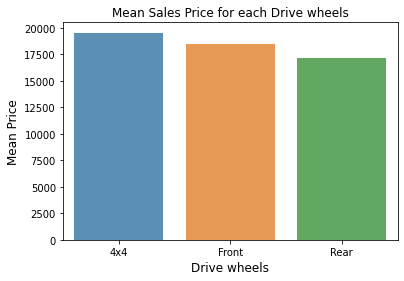

In [30]:
### Mean Price for each Drive wheels

sns.barplot(data=dataset, x=mean_price_drive['Drive wheels'], y=mean_price_drive['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Drive wheels')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Drive wheels', fontsize = 12)
plt.show()

##### The mean of sale price are nearly similar

##### 3.2.6 Categorical variable - Doors

In [31]:
### Value counts of the column - Doors

doors_count = dataset['Doors'].value_counts(dropna = False)
doors_count

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

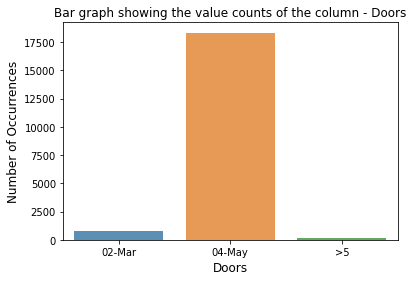

In [32]:
### Bar graph showing the value counts of the column - Doors

sns.barplot(data=dataset, x=doors_count.index, y=doors_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Doors')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Doors', fontsize = 12)
plt.show()

###### The value 02-mar = 2-3 doors
######           04-may = 4-5 doors
######            >5    =  >5 doors
######  We will replace this when we do data processing



In [33]:
### Mean price per each Doors

mean_price_doors = dataset[['Doors', 'Price']].groupby('Doors', as_index = False).mean()
mean_price_doors

,Doors,Price
0,02-Mar,50379.595882
1,04-May,17180.945778
2,>5,22299.437500


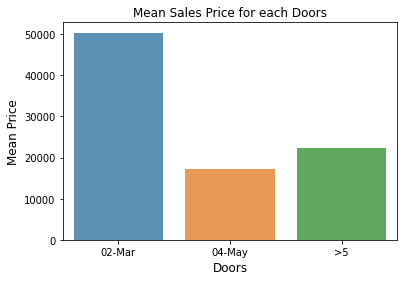

In [34]:
### Mean Price for each Doors

sns.barplot(data=dataset, x=mean_price_doors['Doors'], y=mean_price_doors['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Doors')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Doors', fontsize = 12)
plt.show()

##### 2-3 doors have high price

#### 3.2.7 Categorical variable - Wheel

In [35]:
### Value counts of the column - Wheel

wheel_count = dataset['Wheel'].value_counts(dropna = False)
wheel_count

Left wheel          17753
Right-hand drive     1484
Name: Wheel, dtype: int64

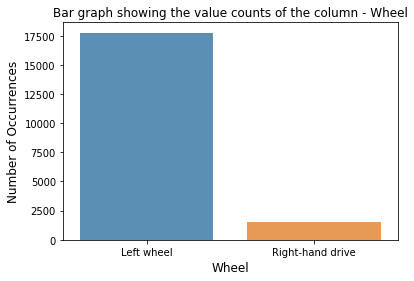

In [36]:
### Bar graph showing the value counts of the column - Wheel

sns.barplot(data=dataset, x=wheel_count.index, y=wheel_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Wheel')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Wheel', fontsize = 12)
plt.show()

##### Most cars have left steering.

In [37]:
### Mean price per each Wheel

mean_price_wheel = dataset[['Wheel', 'Price']].groupby('Wheel', as_index = False).mean()
mean_price_wheel

,Wheel,Price
0,Left wheel,19363.071425
1,Right-hand drive,8900.111186


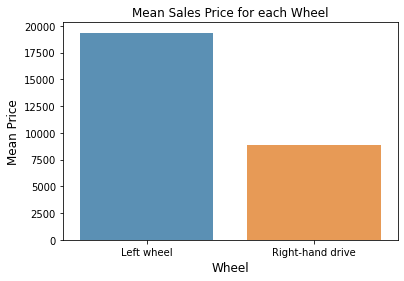

In [38]:
### Mean Price for each Wheel

sns.barplot(data=dataset, x=mean_price_wheel['Wheel'], y=mean_price_wheel['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Wheel')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Wheel', fontsize = 12)
plt.show()

###### Left steering have price higher than right hand drive

#### 3.2.8 Categorical variable - Color

In [39]:
### Value counts of the column - Color

color_count = dataset['Color'].value_counts(dropna = False)
color_count

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

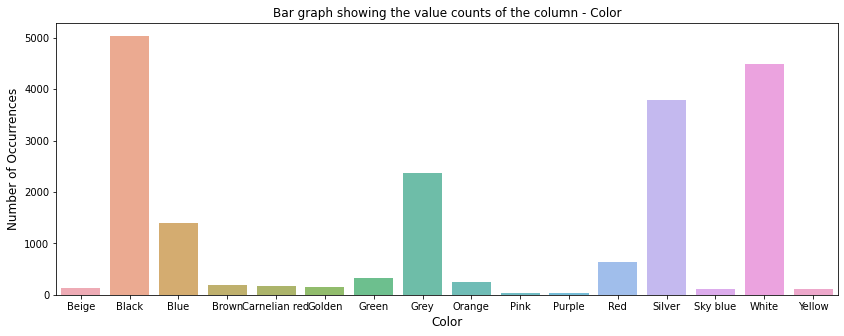

In [40]:
### Bar graph showing the value counts of the column - Color

plt.figure(figsize = (14, 5))
sns.barplot(data=dataset, x=color_count.index, y=color_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Color')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()

##### Some color have insufficient data


In [41]:
### Mean price per each Color

mean_price_color = dataset[['Color', 'Price']].groupby('Color', as_index = False).mean()
mean_price_color

,Color,Price
0,Beige,15627.559701
1,Black,18886.917346
2,Blue,33726.850287
3,Brown,19709.636364
4,Carnelian red,15820.927374
5,Golden,14678.551724
6,Green,9449.677019
7,Grey,19203.448000
8,Orange,13008.422925
9,Pink,10649.076923


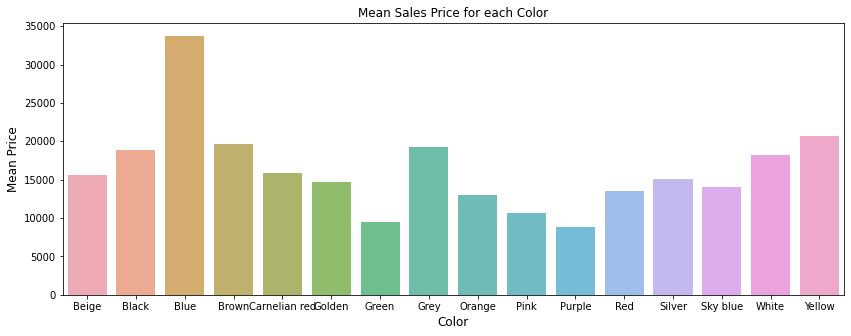

In [42]:
### Mean Price for each Color

plt.figure(figsize = (14, 5))
sns.barplot(data=dataset, x=mean_price_color['Color'], y=mean_price_color['Price'], alpha = 0.8)
plt.title('Mean Sales Price for each Color')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Color', fontsize = 12)
plt.show()

###### Most car tend to have similar mean price but blue have the highest price

#### 3.2.9 Numerical variable - Price

Text(0.5, 1.0, 'Price Distribution')

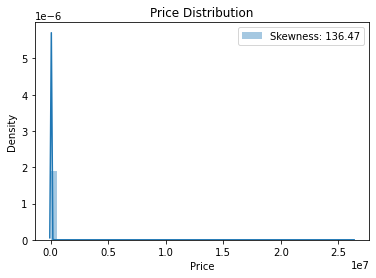

In [43]:
### Understanding the distribution of the column - Price

sns.distplot(dataset['Price'], label = 'Skewness: %.2f'%(dataset['Price'].skew()))
plt.legend(loc = 'best')
plt.title('Price Distribution')

##### The data is highly skewed

<AxesSubplot: >

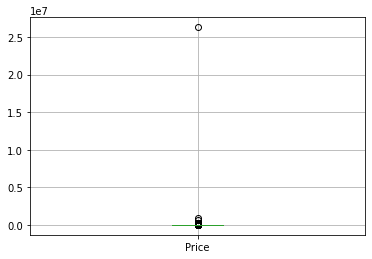

In [44]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['Price'])

##### There are outlier in the column we will remove them in the data processing phrase

#### 3.2.10 Numerical variable - Levy

Text(0.5, 1.0, 'Distribution of the column - Levy')

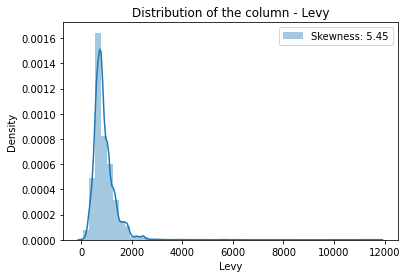

In [45]:
### Understanding the distribution of the column - Levy

sns.distplot(dataset['Levy'], label = 'Skewness: %.2f'%(dataset['Levy'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Levy')

####

###### The distribution tend to be normal distribution but still show a right skewness

<AxesSubplot: >

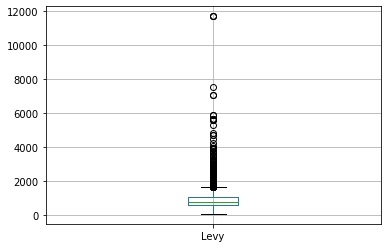

In [46]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['Levy'])

##### Outliers founded

#### 3.2.11 Numerical variable - Prod. year

Text(0.5, 1.0, 'Distribution of the column - Prod. year')

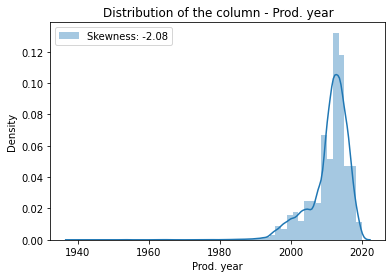

In [47]:
### Understanding the distribution of the column - Prod. year

sns.distplot(dataset['Prod. year'], label = 'Skewness: %.2f'%(dataset['Prod. year'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Prod. year')

##### The graph normally distributed with a left tail

<AxesSubplot: >

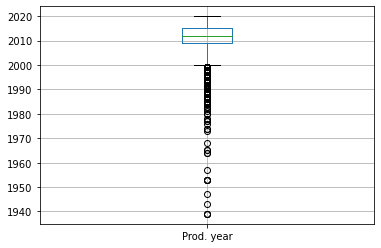

In [48]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['Prod. year'])

##### Outliers founded

#### 3.2.12 Numerical variable - Mileage

In [49]:
### Modifying the column - Mileage

modified_mileage = [float(value.split(' ')[0]) for value in dataset['Mileage']]
dataset['Mileage'] = modified_mileage

Text(0.5, 1.0, 'Distribution of the column - Mileage')

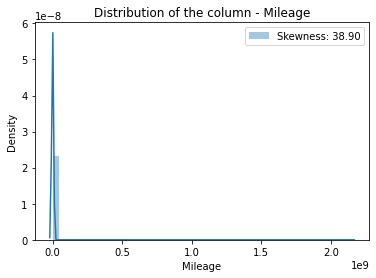

In [50]:
### Understanding the distribution of the column - Mileage

sns.distplot(dataset['Mileage'], label = 'Skewness: %.2f'%(dataset['Mileage'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Mileage')

###### Have high degree of skewness

<AxesSubplot: >

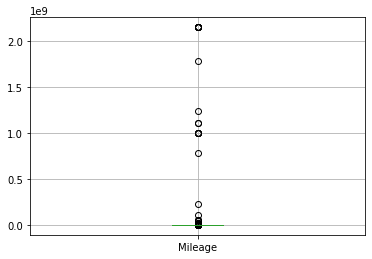

In [51]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['Mileage'])

##### Outliers founded

#### 3.2.13 Numerical variable - Cylinders¶

Text(0.5, 1.0, 'Distribution of the column - Cylinders')

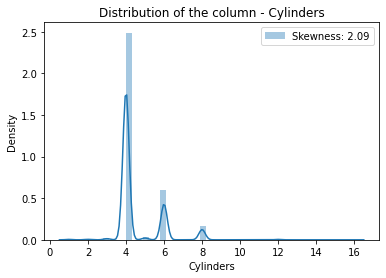

In [52]:

### Understanding the distribution of the column - Cylinders

sns.distplot(dataset['Cylinders'], label = 'Skewness: %.2f'%(dataset['Cylinders'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Cylinders')

##### There are 3 different type cylinder 4,6,8

#### 3.2.14 Numerical variables - Airbags

Text(0.5, 1.0, 'Distribution of the column - Airbags')

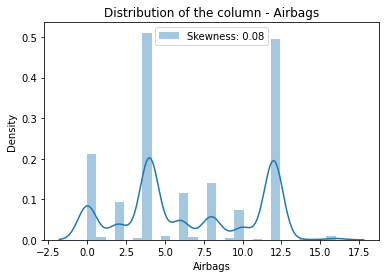

In [53]:
### Understanding the distribution of the column - Airbags

sns.distplot(dataset['Airbags'], label = 'Skewness: %.2f'%(dataset['Airbags'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Airbags')

###### From the above graph, we can see that the data has less skewness.

#### 3.2.15 Numerical variables - Engine volume

In [54]:
### Modifying the column - Engine volume

modified_volume = [float(value.split(' ')[0]) for value in dataset['Engine volume']]
dataset['Engine volume'] = modified_volume

Text(0.5, 1.0, 'Distribution of the column - Engine volume')

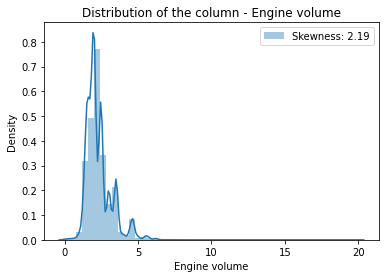

In [55]:
### Understanding the distribution of the column - Engine volume

sns.distplot(dataset['Engine volume'], label = 'Skewness: %.2f'%(dataset['Engine volume'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine volume')

###### From the above graph, we can see that the graph is normally distributed with a slight degree of skewness on the right side.

<AxesSubplot: >

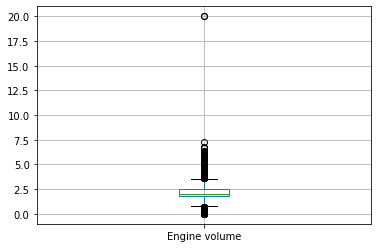

In [56]:
### Plotting a boxplot to check if the column has any outliers 

dataset.boxplot(column = ['Engine volume'])

###### Outlier founded

## 4. Data Preprocessing

#####  Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:
##### 1. Detect and remove outliers in numerical variables
##### 2. Drop and fill missing values
##### 3. Feature Engineering
##### 4. Data Trasformation
##### 5. Feature Encoding
##### 6. Feature Selection

#### 4.1 Detect and remove outliers in numerical variables

###### Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

###### Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [57]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
                                               'Engine volume'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 270 indices:  [90, 211, 420, 483, 573, 579, 723, 724, 747, 1019, 1083, 1128, 1225, 1364, 1459, 1490, 1509, 1510, 1562, 1662, 1704, 1823, 2010, 2054, 2283, 2366, 2726, 2768, 2799, 2859, 2912, 2922, 2941, 2942, 3101, 3365, 3487, 3684, 3686, 3705, 3707, 3765, 3905, 4068, 4183, 4237, 4294, 4351, 4465, 4629, 4649, 4661, 4662, 4705, 4709, 4722, 4919, 5008, 5259, 5412, 5485, 5541, 5718, 5731, 5940, 6405, 6468, 6768, 6826, 6873, 6887, 6950, 7010, 7031, 7094, 7147, 7247, 7254, 7283, 7318, 7353, 7565, 7621, 7667, 7675, 7747, 7749, 7760, 7970, 7997, 8036, 8147, 8246, 8541, 8644, 8755, 8880, 9101, 9172, 9212, 9233, 9247, 9259, 9327, 9367, 9405, 9441, 9452, 9688, 9739, 10082, 10085, 10220, 10468, 10520, 10690, 10710, 10714, 10759, 10948, 11035, 11038, 11041, 11131, 11138, 11210, 11529, 11827, 11906, 11941, 11973, 12081, 12152, 12224, 12848, 12905, 12981, 13088, 13320, 13325, 13351, 13467, 13534, 13631, 13653, 13687, 13745, 13847, 13884, 13889, 13941, 13973, 14193, 14356, 14435, 1

In [58]:
dataset.iloc[outliers_to_drop, :]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
90,45807330,77775,1604.0,MERCEDES-BENZ,GL 63 AMG,2014,Jeep,Yes,Petrol,5.5,433811.0,8.0,Automatic,4x4,04-May,Left wheel,Black,10
211,45156280,72130,1885.0,PORSCHE,Panamera,2010,Hatchback,Yes,Petrol,4.8,196800.0,8.0,Tiptronic,4x4,04-May,Left wheel,White,8
420,45763904,81539,1935.0,LEXUS,GX 460,2016,Jeep,Yes,Petrol,4.6,155976.0,8.0,Automatic,4x4,04-May,Left wheel,White,0
483,45761340,69935,1646.0,LEXUS,GX 470,2015,Jeep,Yes,Petrol,4.6,273493.0,8.0,Automatic,4x4,04-May,Left wheel,Silver,0
573,45731517,119172,1301.0,BMW,M6,2014,Coupe,Yes,Petrol,4.4,33500.0,8.0,Tiptronic,Rear,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7272,45416515,35438,NaN,BMW,X6,2009,Jeep,Yes,Petrol,4.4,960000.0,8.0,Tiptronic,4x4,04-May,Left wheel,Silver,12
9114,45813297,31988,3015.0,FERRARI,F50,2017,Coupe,Yes,Petrol,6.3,419200.0,12.0,Automatic,Rear,02-Mar,Left wheel,Silver,12
10973,45416515,35438,NaN,BMW,X6,2009,Jeep,Yes,Petrol,4.4,960000.0,8.0,Tiptronic,4x4,04-May,Left wheel,Silver,12
13850,45796827,1000,NaN,MERCEDES-BENZ,GLS 63 AMG,2014,Sedan,Yes,Petrol,6.3,748742.0,1.0,Manual,Front,02-Mar,Left wheel,Black,12


In [59]:
#### We will drop these rows from the dataset.

In [60]:
### Drop outliers and reset index

print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 19237 rows
After: 18967 rows


In [61]:
### Lets look at the new dataset

dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18962,45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
18963,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
18964,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
18965,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


#### 4.2 Drop and fill missing values

###### Here in the dataset, only the column - Levy has missing values. We will focus on replacing those missing values.

##### 4.2.1 Handling missing values - Levy

In [62]:
### Replacing the missing values in the column - Levy using median

levy_index = list(~dataset['Levy'].isnull())
median_levy = np.median(dataset['Levy'].loc[levy_index])
median_levy

781.0

In [63]:
### Replacing the missing values of the column - Levy in the dataset

dataset['Levy'].fillna(median_levy, inplace = True)

In [64]:
### Checking if there are any missing values of Levy in the dataset

dataset['Levy'].isnull().sum()

0

#### 4.2.2 Dropping unnecessary columns

###### Here, we will drop the columns - ID, Model, Leather interior, Drive wheels, Color from the dataset.

In [65]:
### Dropping the columns - ID, Manufacturer, Model, Leather interior, Drive wheels, Color

dataset.drop(['ID', 'Manufacturer', 'Model', 'Leather interior', 'Drive wheels', 'Color'], axis = 1, inplace = True)
dataset

,Price,Levy,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags
0,13328,1399.0,2010,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,04-May,Left wheel,12
1,16621,1018.0,2011,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,04-May,Left wheel,8
2,8467,781.0,2006,Hatchback,Petrol,1.3,200000.0,4.0,Variator,04-May,Right-hand drive,2
3,3607,862.0,2011,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,04-May,Left wheel,0
4,11726,446.0,2014,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18962,8467,781.0,1999,Coupe,CNG,2.0,300000.0,4.0,Manual,02-Mar,Left wheel,5
18963,15681,831.0,2011,Sedan,Petrol,2.4,161600.0,4.0,Tiptronic,04-May,Left wheel,8
18964,26108,836.0,2010,Jeep,Diesel,2.0,116365.0,4.0,Automatic,04-May,Left wheel,4
18965,5331,1288.0,2007,Jeep,Diesel,2.0,51258.0,4.0,Automatic,04-May,Left wheel,4


#### 4.3 Feature Engineering

###### Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

###### Here, we focus on creating new columns for:

###### 1.NewCategory - using the column Category
###### 2.NewFuelType - using the column Fuel type
###### 3.NewGearbox - using the column Gear box
###### 4.NewDoors - using the column Doors
###### 5.Age - using the column Prod. year

##### 4.3.1 NewCategory - using the column Category

###### Here, we will create the NewCategory column such that if the mean price of a category is less than 20000 then it belongs to class 1, else class 2.

In [66]:
### Seperating the categories into class 1 and 2

class_1 = []
class_2 = []

for index in range(len(mean_price_category)):
    if mean_price_category.iloc[index, 1] <= 20000:
        class_1.append(mean_price_category.iloc[index, 0])
    else:
        class_2.append(mean_price_category.iloc[index, 0])
        
print('Categories with less than 20000 mean price: ', class_1)
print('Categories with more than 20000 mean price: ', class_2)

Categories with less than 20000 mean price:  ['Hatchback', 'Limousine', 'Microbus', 'Sedan']
Categories with more than 20000 mean price:  ['Cabriolet', 'Coupe', 'Goods wagon', 'Jeep', 'Minivan', 'Pickup', 'Universal']


In [67]:
### Modifying the Category column in the dataset

category_data = dataset['Category']
new_category_data = []

for value in category_data:
    if value in class_1:
        new_category_data.append(1)
    else:
        new_category_data.append(2)
        
dataset['Category'] = new_category_data

In [68]:
### Looking at the modified dataset

dataset

,Price,Levy,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags
0,13328,1399.0,2010,2,Hybrid,3.5,186005.0,6.0,Automatic,04-May,Left wheel,12
1,16621,1018.0,2011,2,Petrol,3.0,192000.0,6.0,Tiptronic,04-May,Left wheel,8
2,8467,781.0,2006,1,Petrol,1.3,200000.0,4.0,Variator,04-May,Right-hand drive,2
3,3607,862.0,2011,2,Hybrid,2.5,168966.0,4.0,Automatic,04-May,Left wheel,0
4,11726,446.0,2014,1,Petrol,1.3,91901.0,4.0,Automatic,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18962,8467,781.0,1999,2,CNG,2.0,300000.0,4.0,Manual,02-Mar,Left wheel,5
18963,15681,831.0,2011,1,Petrol,2.4,161600.0,4.0,Tiptronic,04-May,Left wheel,8
18964,26108,836.0,2010,2,Diesel,2.0,116365.0,4.0,Automatic,04-May,Left wheel,4
18965,5331,1288.0,2007,2,Diesel,2.0,51258.0,4.0,Automatic,04-May,Left wheel,4


##### 4.3.2 NewFuelType - using the column Fuel type

###### Here, if the fuel type is Hybrid, Hydrogen, Plug-in Hybrid then we rename it to other.

In [69]:
### Creating the new fuel type data

fuel_type_data = dataset['Fuel type']
new_fuel_type_data = []

for value in fuel_type_data:
    if value in {'Hybrid', 'Hydrogen', 'Plug-in Hybrid'}:
        new_fuel_type_data.append('Other')
    else:
        new_fuel_type_data.append(value)

set(new_fuel_type_data)

{'CNG', 'Diesel', 'LPG', 'Other', 'Petrol'}

In [70]:
### Modifying the Fuel Type column

dataset['Fuel type'] = new_fuel_type_data

In [71]:
### Looking at the modified dataset

dataset

,Price,Levy,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags
0,13328,1399.0,2010,2,Other,3.5,186005.0,6.0,Automatic,04-May,Left wheel,12
1,16621,1018.0,2011,2,Petrol,3.0,192000.0,6.0,Tiptronic,04-May,Left wheel,8
2,8467,781.0,2006,1,Petrol,1.3,200000.0,4.0,Variator,04-May,Right-hand drive,2
3,3607,862.0,2011,2,Other,2.5,168966.0,4.0,Automatic,04-May,Left wheel,0
4,11726,446.0,2014,1,Petrol,1.3,91901.0,4.0,Automatic,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18962,8467,781.0,1999,2,CNG,2.0,300000.0,4.0,Manual,02-Mar,Left wheel,5
18963,15681,831.0,2011,1,Petrol,2.4,161600.0,4.0,Tiptronic,04-May,Left wheel,8
18964,26108,836.0,2010,2,Diesel,2.0,116365.0,4.0,Automatic,04-May,Left wheel,4
18965,5331,1288.0,2007,2,Diesel,2.0,51258.0,4.0,Automatic,04-May,Left wheel,4


##### 4.3.3 NewGearbox - using the column Gear box

###### Here, we will divide the column Gear box into 2 classes such that if the Gear box is either Automatic or Variator it belongs to class 1, else it belongs to class 2.

In [72]:
### Seperating the categories into class 1 and 2

gear_box_data = dataset['Gear box type']
new_gear_box_data = []

for value in gear_box_data:
    if value in {'Automatic', 'Variator'}:
        new_gear_box_data.append(1)
    else:
        new_gear_box_data.append(2)

set(new_gear_box_data)

{1, 2}

In [73]:
### Modifying the Gear box type column

dataset['Gear box type'] = new_gear_box_data

In [74]:
### Looking at the modified dataset

dataset

,Price,Levy,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags
0,13328,1399.0,2010,2,Other,3.5,186005.0,6.0,1,04-May,Left wheel,12
1,16621,1018.0,2011,2,Petrol,3.0,192000.0,6.0,2,04-May,Left wheel,8
2,8467,781.0,2006,1,Petrol,1.3,200000.0,4.0,1,04-May,Right-hand drive,2
3,3607,862.0,2011,2,Other,2.5,168966.0,4.0,1,04-May,Left wheel,0
4,11726,446.0,2014,1,Petrol,1.3,91901.0,4.0,1,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18962,8467,781.0,1999,2,CNG,2.0,300000.0,4.0,2,02-Mar,Left wheel,5
18963,15681,831.0,2011,1,Petrol,2.4,161600.0,4.0,2,04-May,Left wheel,8
18964,26108,836.0,2010,2,Diesel,2.0,116365.0,4.0,1,04-May,Left wheel,4
18965,5331,1288.0,2007,2,Diesel,2.0,51258.0,4.0,1,04-May,Left wheel,4


##### 4.3.4 NewDoors - using the column Doors

###### Here, we will modify the column Doors such that if the value is 04-May it is changed to 4-5, 02-Mar then it is changed to 2-3 or else keep it as it is.

In [75]:
### Creating the new Doors data

doors_data = dataset['Doors']
new_doors_data = []

for value in doors_data:
    if value == '04-May':
        new_doors_data.append('4-5')
    elif value == '02-Mar':
        new_doors_data.append('2-3')
    else:
        new_doors_data.append(value)

set(new_doors_data)

{'2-3', '4-5', '>5'}

In [76]:
### Modifying the Doors column

dataset['Doors'] = new_doors_data

In [77]:
### Looking at the modified dataset

dataset

,Price,Levy,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags
0,13328,1399.0,2010,2,Other,3.5,186005.0,6.0,1,4-5,Left wheel,12
1,16621,1018.0,2011,2,Petrol,3.0,192000.0,6.0,2,4-5,Left wheel,8
2,8467,781.0,2006,1,Petrol,1.3,200000.0,4.0,1,4-5,Right-hand drive,2
3,3607,862.0,2011,2,Other,2.5,168966.0,4.0,1,4-5,Left wheel,0
4,11726,446.0,2014,1,Petrol,1.3,91901.0,4.0,1,4-5,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18962,8467,781.0,1999,2,CNG,2.0,300000.0,4.0,2,2-3,Left wheel,5
18963,15681,831.0,2011,1,Petrol,2.4,161600.0,4.0,2,4-5,Left wheel,8
18964,26108,836.0,2010,2,Diesel,2.0,116365.0,4.0,1,4-5,Left wheel,4
18965,5331,1288.0,2007,2,Diesel,2.0,51258.0,4.0,1,4-5,Left wheel,4


##### 4.3.5 Age - using the column Prod. year

###### Here, we will use the column Prod. year to create Age using the formula 2022 - value.

In [78]:
### Creating the Age data

year_data = dataset['Prod. year']
age_data = []

for value in year_data:
    age_data.append(2022 - value)
    
len(set(age_data))

51

In [79]:
### Creating the Age column

dataset['Age'] = age_data

In [80]:
### Removing the Prod. year column

dataset.drop(['Prod. year'], axis = 1, inplace = True)

In [81]:
### Looking at the modified dataset

dataset

,Price,Levy,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags,Age
0,13328,1399.0,2,Other,3.5,186005.0,6.0,1,4-5,Left wheel,12,12
1,16621,1018.0,2,Petrol,3.0,192000.0,6.0,2,4-5,Left wheel,8,11
2,8467,781.0,1,Petrol,1.3,200000.0,4.0,1,4-5,Right-hand drive,2,16
3,3607,862.0,2,Other,2.5,168966.0,4.0,1,4-5,Left wheel,0,11
4,11726,446.0,1,Petrol,1.3,91901.0,4.0,1,4-5,Left wheel,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
18962,8467,781.0,2,CNG,2.0,300000.0,4.0,2,2-3,Left wheel,5,23
18963,15681,831.0,1,Petrol,2.4,161600.0,4.0,2,4-5,Left wheel,8,11
18964,26108,836.0,2,Diesel,2.0,116365.0,4.0,1,4-5,Left wheel,4,12
18965,5331,1288.0,2,Diesel,2.0,51258.0,4.0,1,4-5,Left wheel,4,15


#### 4.4 Data Transformation

###### In this section, we will remove the skewness present in the columns - Price, Levy, Age, Mileage, Engine volume by using a Box-Cox transformation on the data. Then, we will normalize all the numerical columns apart from the Target using MinMax Normalization.

##### 4.4.1 Box Cox transforming the column - Price

Text(0.5, 1.0, 'Distribution of the column - Price')

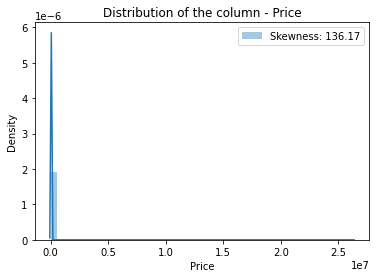

In [82]:
### Understanding the distribution of the column - Price

sns.distplot(dataset['Price'], label = 'Skewness: %.2f'%(dataset['Price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price')

Text(0.5, 1.0, 'Distribution of the column - Price')

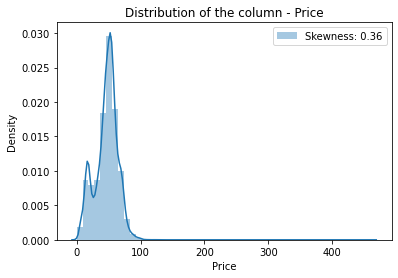

In [83]:
### Understanding the distribution of the data Box_Cox(Price)

price_data = [1 if value == 0 else value for value in dataset['Price']]

modified_price, _ = stats.boxcox(price_data)
dataset['Price'] = modified_price

sns.distplot(dataset['Price'], label = 'Skewness: %.2f'%(dataset['Price'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Price')

##### 4.4.2 Box Cox transforming the column - Levy

Text(0.5, 1.0, 'Distribution of the column - Levy')

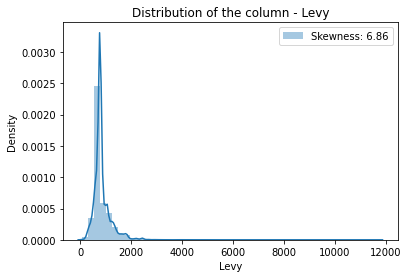

In [84]:
### Understanding the distribution of the column - Levy

sns.distplot(dataset['Levy'], label = 'Skewness: %.2f'%(dataset['Levy'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Levy')

Text(0.5, 1.0, 'Distribution of the column - Levy')

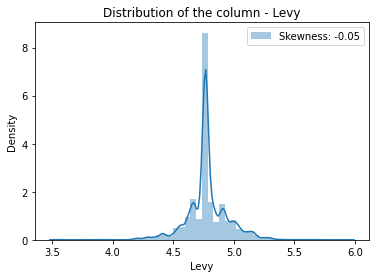

In [85]:
### Understanding the distribution of the data Box_Cox(Levy)

levy_data = [1 if value == 0 else value for value in dataset['Levy']]

modified_levy, _ = stats.boxcox(levy_data)
dataset['Levy'] = modified_levy

sns.distplot(dataset['Levy'], label = 'Skewness: %.2f'%(dataset['Levy'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Levy')

##### 4.4.3 Box Cox transforming the column - Age

Text(0.5, 1.0, 'Distribution of the column - Age')

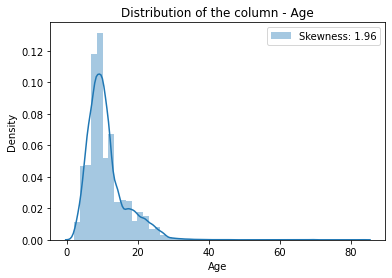

In [86]:
### Understanding the distribution of the column - Age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Age')

Text(0.5, 1.0, 'Distribution of the column - Age')

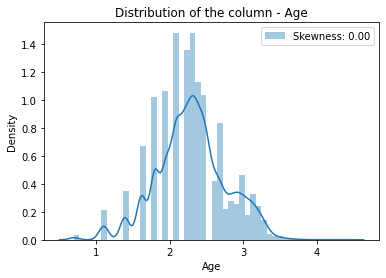

In [87]:
### Understanding the distribution of the data Box_Cox(Age)

age_data = [1 if value == 0 else value for value in dataset['Age']]

modified_age, _ = stats.boxcox(age_data)
dataset['Age'] = modified_age

sns.distplot(dataset['Age'], label = 'Skewness: %.2f'%(dataset['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Age')

#### 4.4.4 Box Cox transforming the column - Mileage

Text(0.5, 1.0, 'Distribution of the column - Mileage')

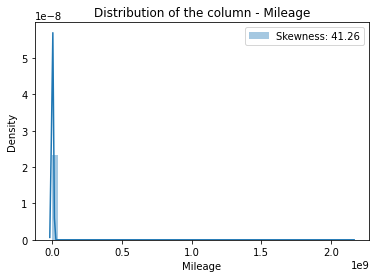

In [88]:
### Understanding the distribution of the column - Mileage

sns.distplot(dataset['Mileage'], label = 'Skewness: %.2f'%(dataset['Mileage'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Mileage')

Text(0.5, 1.0, 'Distribution of the column - Mileage')

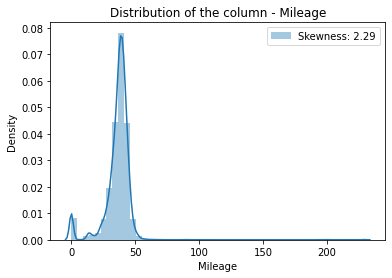

In [89]:
### Understanding the distribution of the data Box_Cox(Mileage)

mileage_data = [1 if value == 0 else value for value in dataset['Mileage']]

modified_mileage, _ = stats.boxcox(mileage_data)
dataset['Mileage'] = modified_mileage

sns.distplot(dataset['Mileage'], label = 'Skewness: %.2f'%(dataset['Mileage'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Mileage')

##### 4.4.5 Box Cox transforming the column - Engine volume

Text(0.5, 1.0, 'Distribution of the column - Engine volume')

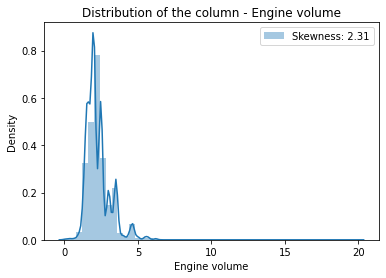

In [90]:
### Understanding the distribution of the column - Engine volume

sns.distplot(dataset['Engine volume'], label = 'Skewness: %.2f'%(dataset['Engine volume'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine volume')

Text(0.5, 1.0, 'Distribution of the column - Engine volume')

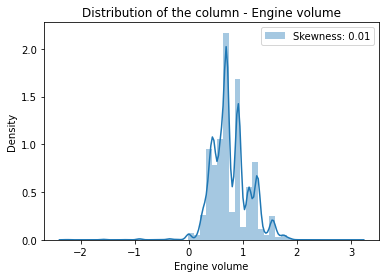

In [91]:
### Understanding the distribution of the data Box_Cox(Engine volume)

engine_data = [1 if value == 0 else value for value in dataset['Engine volume']]

modified_engine, _ = stats.boxcox(engine_data)
dataset['Engine volume'] = modified_engine

sns.distplot(dataset['Engine volume'], label = 'Skewness: %.2f'%(dataset['Engine volume'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Engine volume')

##### 4.4.6 Normalizing the numerical columns

In [92]:
### A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']
for each_column in numerical_columns:
    normalize_columns(dataset, each_column)

In [93]:
### Looking at the sample records of the dataset

dataset

,Price,Levy,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Airbags,Age
0,49.474439,0.629677,2,Other,0.658421,0.179513,0.333333,1,4-5,Left wheel,0.7500,0.479728
1,52.930471,0.566695,2,Petrol,0.628821,0.180635,0.333333,2,4-5,Left wheel,0.5000,0.456381
2,43.023184,0.512535,1,Petrol,0.469937,0.182087,0.200000,1,4-5,Right-hand drive,0.1250,0.556958
3,32.941926,0.532881,2,Other,0.593937,0.176152,0.200000,1,4-5,Left wheel,0.0000,0.456381
4,47.567865,0.392874,1,Petrol,0.469937,0.156094,0.200000,1,4-5,Left wheel,0.2500,0.370976
...,...,...,...,...,...,...,...,...,...,...,...,...
18962,43.023184,0.512535,2,CNG,0.551429,0.197086,0.200000,2,2-3,Left wheel,0.3125,0.654463
18963,51.997927,0.525355,1,Petrol,0.586145,0.174611,0.200000,2,4-5,Left wheel,0.5000,0.456381
18964,60.716837,0.526589,2,Diesel,0.551429,0.163619,0.200000,1,4-5,Left wheel,0.2500,0.479728
18965,37.253177,0.613505,2,Diesel,0.551429,0.138741,0.200000,1,4-5,Left wheel,0.2500,0.539627


#### 4.5 Feature Encoding
###### Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

###### Here, we will use One Hot Encoding for the columns - Category, Fuel type, Gear box type, Doors, Wheel

In [94]:
### One Hot Encoding the columns - Category, Fuel type, Gear box type, Doors, Wheel of the dataset

encoded_dataset = pd.get_dummies(data = dataset, columns = ['Category', 'Fuel type', 'Gear box type', 'Doors', 'Wheel'])
encoded_dataset

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Category_1,Category_2,Fuel type_CNG,...,Fuel type_LPG,Fuel type_Other,Fuel type_Petrol,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive
0,49.474439,0.629677,0.658421,0.179513,0.333333,0.7500,0.479728,0,1,0,...,0,1,0,1,0,0,1,0,1,0
1,52.930471,0.566695,0.628821,0.180635,0.333333,0.5000,0.456381,0,1,0,...,0,0,1,0,1,0,1,0,1,0
2,43.023184,0.512535,0.469937,0.182087,0.200000,0.1250,0.556958,1,0,0,...,0,0,1,1,0,0,1,0,0,1
3,32.941926,0.532881,0.593937,0.176152,0.200000,0.0000,0.456381,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4,47.567865,0.392874,0.469937,0.156094,0.200000,0.2500,0.370976,1,0,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18962,43.023184,0.512535,0.551429,0.197086,0.200000,0.3125,0.654463,0,1,1,...,0,0,0,0,1,1,0,0,1,0
18963,51.997927,0.525355,0.586145,0.174611,0.200000,0.5000,0.456381,1,0,0,...,0,0,1,0,1,0,1,0,1,0
18964,60.716837,0.526589,0.551429,0.163619,0.200000,0.2500,0.479728,0,1,0,...,0,0,0,1,0,0,1,0,1,0
18965,37.253177,0.613505,0.551429,0.138741,0.200000,0.2500,0.539627,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [95]:
### Create the column - Target using Price

target_data = encoded_dataset['Price']
encoded_dataset['Target'] = target_data

### Dropping the column - Price

encoded_dataset.drop(['Price'], axis = 1, inplace = True)
encoded_dataset

,Levy,Engine volume,Mileage,Cylinders,Airbags,Age,Category_1,Category_2,Fuel type_CNG,Fuel type_Diesel,...,Fuel type_Other,Fuel type_Petrol,Gear box type_1,Gear box type_2,Doors_2-3,Doors_4-5,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive,Target
0,0.629677,0.658421,0.179513,0.333333,0.7500,0.479728,0,1,0,0,...,1,0,1,0,0,1,0,1,0,49.474439
1,0.566695,0.628821,0.180635,0.333333,0.5000,0.456381,0,1,0,0,...,0,1,0,1,0,1,0,1,0,52.930471
2,0.512535,0.469937,0.182087,0.200000,0.1250,0.556958,1,0,0,0,...,0,1,1,0,0,1,0,0,1,43.023184
3,0.532881,0.593937,0.176152,0.200000,0.0000,0.456381,0,1,0,0,...,1,0,1,0,0,1,0,1,0,32.941926
4,0.392874,0.469937,0.156094,0.200000,0.2500,0.370976,1,0,0,0,...,0,1,1,0,0,1,0,1,0,47.567865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18962,0.512535,0.551429,0.197086,0.200000,0.3125,0.654463,0,1,1,0,...,0,0,0,1,1,0,0,1,0,43.023184
18963,0.525355,0.586145,0.174611,0.200000,0.5000,0.456381,1,0,0,0,...,0,1,0,1,0,1,0,1,0,51.997927
18964,0.526589,0.551429,0.163619,0.200000,0.2500,0.479728,0,1,0,1,...,0,0,1,0,0,1,0,1,0,60.716837
18965,0.613505,0.551429,0.138741,0.200000,0.2500,0.539627,0,1,0,1,...,0,0,1,0,0,1,0,1,0,37.253177


#### 4.6 Feature Selection
###### Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

##### 4.6.1 Plotting the correlation matrix for the numerical columns

In [96]:
### Creating a filter_dataset

filter_dataset = encoded_dataset[['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']]
filter_dataset

,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
0,0.629677,0.658421,0.179513,0.333333,0.7500,0.479728
1,0.566695,0.628821,0.180635,0.333333,0.5000,0.456381
2,0.512535,0.469937,0.182087,0.200000,0.1250,0.556958
3,0.532881,0.593937,0.176152,0.200000,0.0000,0.456381
4,0.392874,0.469937,0.156094,0.200000,0.2500,0.370976
...,...,...,...,...,...,...
18962,0.512535,0.551429,0.197086,0.200000,0.3125,0.654463
18963,0.525355,0.586145,0.174611,0.200000,0.5000,0.456381
18964,0.526589,0.551429,0.163619,0.200000,0.2500,0.479728
18965,0.613505,0.551429,0.138741,0.200000,0.2500,0.539627


Text(0.5, 1.0, 'Correlation Heatmap')

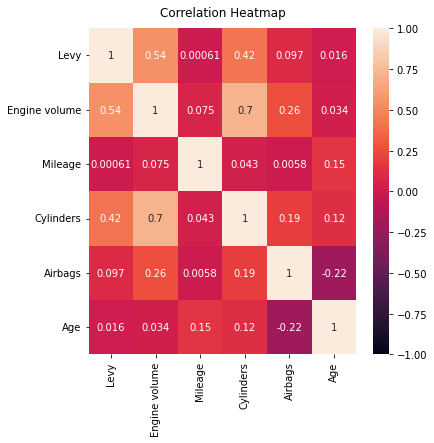

In [97]:
### Plotting the correlation between various columns of the filter_dataset

plt.figure(figsize = (6, 6))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

##### 4.6.2 Removing the columns that cause multicollinearity using VIF

In [98]:
### Detecting the columns that cause multicollinearity using VIF

names = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']

for i in range(len(names)):
    y = filter_dataset.iloc[:, filter_dataset.columns == names[i]].values
    x = filter_dataset.iloc[:, filter_dataset.columns != names[i]].values
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    results = model.fit()
    
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names[i], vif)
        )

R Square value of Levy column is 0.3 keeping all other columns as features
Variance Inflation Factor of Levy column is 1.43 

R Square value of Engine volume column is 0.59 keeping all other columns as features
Variance Inflation Factor of Engine volume column is 2.41 

R Square value of Mileage column is 0.03 keeping all other columns as features
Variance Inflation Factor of Mileage column is 1.03 

R Square value of Cylinders column is 0.51 keeping all other columns as features
Variance Inflation Factor of Cylinders column is 2.04 

R Square value of Airbags column is 0.12 keeping all other columns as features
Variance Inflation Factor of Airbags column is 1.14 

R Square value of Age column is 0.1 keeping all other columns as features
Variance Inflation Factor of Age column is 1.11 



###### Since there is no column with a VIF of greater than 10, we will keep all the columns. Now our datasets are ready to modelling.

### 5. Modelling

###### Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

###### Since Car Price Prediction is a regression problem, we will need to use regression models, also known as regressors, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following regression models for the job:

##### 5.1 Splitting the data to Training and Test sets
###### Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [99]:
 ### Splitting the dataset to the matrices X and Y

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [100]:
### Looking at the new training data - X

X



array([[0.62967695, 0.65842071, 0.17951255, ..., 0.        , 1.        ,
        0.        ],
       [0.56669518, 0.62882066, 0.18063451, ..., 0.        , 1.        ,
        0.        ],
       [0.51253544, 0.46993749, 0.18208737, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.52658936, 0.55142852, 0.16361879, ..., 0.        , 1.        ,
        0.        ],
       [0.61350496, 0.55142852, 0.1387409 , ..., 0.        , 1.        ,
        0.        ],
       [0.50495351, 0.58614549, 0.17968628, ..., 0.        , 1.        ,
        0.        ]])

In [101]:
### Looking at the new test data - Y

Y


array([49.47443883, 52.93047067, 43.0231844 , ..., 60.71683673,
       37.25317749, 16.83787204])

In [102]:
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

In [103]:
X_train

array([[0.51253544, 0.66911524, 0.16090855, ..., 0.        , 1.        ,
        0.        ],
       [0.51253544, 0.55142852, 0.16212153, ..., 0.        , 0.        ,
        1.        ],
       [0.67276052, 0.6471106 , 0.17875086, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.54507973, 0.62882066, 0.18728915, ..., 0.        , 1.        ,
        0.        ],
       [0.57838427, 0.55142852, 0.10923963, ..., 0.        , 1.        ,
        0.        ],
       [0.51253544, 0.53142795, 0.15057149, ..., 0.        , 1.        ,
        0.        ]])

In [104]:
X_test

array([[0.54170822, 0.58614549, 0.15335443, ..., 0.        , 1.        ,
        0.        ],
       [0.59987646, 0.58614549, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.44311923, 0.48390293, 0.15367126, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.50824049, 0.55142852, 0.16160244, ..., 0.        , 1.        ,
        0.        ],
       [0.51253544, 0.64120146, 0.18124524, ..., 0.        , 1.        ,
        0.        ],
       [0.61212663, 0.4969244 , 0.05441558, ..., 0.        , 1.        ,
        0.        ]])

In [105]:
Y_train

array([55.24763947, 36.04751909, 16.83787204, ..., 50.00365691,
       29.6349931 , 55.79245286])

In [106]:
Y_test

array([57.8565661 , 53.97325547, 62.08268892, ..., 20.04504146,
       45.774181  , 11.16801217])

In [107]:
X_train

array([[0.51253544, 0.66911524, 0.16090855, ..., 0.        , 1.        ,
        0.        ],
       [0.51253544, 0.55142852, 0.16212153, ..., 0.        , 0.        ,
        1.        ],
       [0.67276052, 0.6471106 , 0.17875086, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.54507973, 0.62882066, 0.18728915, ..., 0.        , 1.        ,
        0.        ],
       [0.57838427, 0.55142852, 0.10923963, ..., 0.        , 1.        ,
        0.        ],
       [0.51253544, 0.53142795, 0.15057149, ..., 0.        , 1.        ,
        0.        ]])

##### We can apply regressors with regression

#### 5.2 Fit the model

###### In this section, we use various machine learning models to predict the results for our test data (X_test). We will store the model and its corresponding Root Mean Squared Error and Adjusted R-squared so that we can tabulate them later for choosing the best model.

In [108]:
### Dictionary to store model and its rmse

model_rmse = OrderedDict()

In [109]:
### Dictionary to store model and its r-squared

model_r2 = OrderedDict()

#### 5.2.1 Applying Multi Linear Regression

In [110]:
### Training the Multi Linear Regression model on the Training set

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [111]:
### Predicting the Test set results

Y_pred = linear_regressor.predict(X_test)

In [112]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 15.271
R-squared value of the model is : 0.216


##### 5.2.2 Applying Lasso Regression

In [113]:
### Training the Lasso Regression model on the Training set

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [114]:
# Finding out negative mean squared error in Lasso Regression

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-250.45196089941987


In [115]:
### Predicting the Test set results

Y_pred = lasso_regressor.predict(X_test)

In [116]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Lasso Regression'] = rmse
model_r2['Lasso Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 15.269
R-squared value of the model is : 0.216


##### 5.2.3 Applying Ridge Regression

In [117]:
### Training the Ridge Regression model on the Training set

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [118]:
# Finding out negative mean squared error in Lasso Regression

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-250.4579230637267


In [119]:
### Predicting the Test set results

Y_pred = ridge_regressor.predict(X_test)

In [120]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Ridge Regression'] = rmse
model_r2['Ridge Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 15.268
R-squared value of the model is : 0.216


##### 5.2.4 Applying Support Vector Regression

In [121]:
### Training the Support Vector Regression model on the Training set

support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(X_train, Y_train)

SVR()

In [122]:
### Predicting the Test set results

Y_pred = support_vector_regressor.predict(X_test)

In [123]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Support Vector Regression'] = rmse
model_r2['Support Vector Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 14.105
R-squared value of the model is : 0.331


##### 5.2.5 Applying Decision Tree Regression

In [124]:
### Training the Decision Tree Regression model on the Training set

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [125]:
### Predicting the Test set results

Y_pred = decision_tree_regressor.predict(X_test)

In [126]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Decision Tree Regression'] = rmse
model_r2['Decision Tree Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 12.858
R-squared value of the model is : 0.444


##### 5.2.6 Applying Random Forest Regression (10 trees)

In [127]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [128]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [129]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (10 trees)'] = rmse
model_r2['Random Forest Regression (10 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 10.494
R-squared value of the model is : 0.63


##### 5.2.7 Applying Random Forest Regression (25 trees)

In [130]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 25, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=27)

In [131]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [132]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (25 trees)'] = rmse
model_r2['Random Forest Regression (25 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 10.258
R-squared value of the model is : 0.646


##### 5.2.8 Applying Random Forest Regression (50 trees)

In [133]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [134]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [135]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (50 trees)'] = rmse
model_r2['Random Forest Regression (50 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 10.144
R-squared value of the model is : 0.654


##### 5.2.9 Applying Random Forest Regression (100 trees)

In [136]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [137]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [138]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (100 trees)'] = rmse
model_r2['Random Forest Regression (100 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 10.102
R-squared value of the model is : 0.657


##### 5.2.10 Applying Random Forest Regression (1000 trees)

In [139]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=27)

In [140]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [141]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Random Forest Regression (1000 trees)'] = rmse
model_r2['Random Forest Regression (1000 trees)'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 10.043
R-squared value of the model is : 0.661


##### 5.2.11 Applying Stacking Regression

In [142]:
### Preparing the Stacking Regressor

### Define the base models

base_models = list()

base_models.append(('decision_tree', decision_tree_regressor))
base_models.append(('support_vector', support_vector_regressor))

### Define the meta models

meta_model = random_forest_regressor

In [143]:
### Training the Stacking Regression model on the Training set

stacking_regressor = StackingRegressor(estimators = base_models, final_estimator = meta_model)
stacking_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('decision_tree', DecisionTreeRegressor()),
                              ('support_vector', SVR())],
                  final_estimator=RandomForestRegressor(n_estimators=1000,
                                                        random_state=27))

In [144]:
### Predicting the Test set results

Y_pred = stacking_regressor.predict(X_test)

In [145]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Stacking Regression'] = rmse
model_r2['Stacking Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 11.99
R-squared value of the model is : 0.517


##### 5.2.12 Applying XGBoost Regression

In [146]:
### Training the XGBoost Regression model on the Training set

xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)

[13:02:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [147]:
### Predicting the Test set results

Y_pred = xgboost_regressor.predict(X_test)

In [148]:
### Calculating RMSE and Adjusted R-squared for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['XGBoost Regression'] = rmse
model_r2['XGBoost Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 10.391
R-squared value of the model is : 0.637


#### 5.3 Model Evaluation

###### Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 5.3.1 RMSE, R-squared of the models
###### Now we will tabulate all the models along with their rmse, r-squared. This data is stored in the model_performance dictionary. We will use the tabulate package for tabulating the results.

In [149]:
### Looking at the model rmse dictionary

model_rmse

OrderedDict([('Multi Linear Regression', 15.271),
             ('Lasso Regression', 15.269),
             ('Ridge Regression', 15.268),
             ('Support Vector Regression', 14.105),
             ('Decision Tree Regression', 12.858),
             ('Random Forest Regression (10 trees)', 10.494),
             ('Random Forest Regression (25 trees)', 10.258),
             ('Random Forest Regression (50 trees)', 10.144),
             ('Random Forest Regression (100 trees)', 10.102),
             ('Random Forest Regression (1000 trees)', 10.043),
             ('Stacking Regression', 11.99),
             ('XGBoost Regression', 10.391)])

In [150]:
### Looking at the model r-squared dictionary

model_r2

OrderedDict([('Multi Linear Regression', 0.216),
             ('Lasso Regression', 0.216),
             ('Ridge Regression', 0.216),
             ('Support Vector Regression', 0.331),
             ('Decision Tree Regression', 0.444),
             ('Random Forest Regression (10 trees)', 0.63),
             ('Random Forest Regression (25 trees)', 0.646),
             ('Random Forest Regression (50 trees)', 0.654),
             ('Random Forest Regression (100 trees)', 0.657),
             ('Random Forest Regression (1000 trees)', 0.661),
             ('Stacking Regression', 0.517),
             ('XGBoost Regression', 0.637)])

In [151]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model                  │   Root Mean Squared Error │   R-squared │
╞═════════╪═══════════════════════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Multi Linear Regression               │                    15.271 │       0.216 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Lasso Regression                      │                    15.269 │       0.216 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       3 │ Ridge Regression                      │                    15.268 │       0.216 │
├─────────┼───────────────────────────────────────┼───────────────────────────┼─────────────┤
│       4 │ Support Vector Regression             │                    14.105 │       0.331 │
├─────────┼───────────────────────────────────────┼─────────

##### From the above table, we can see that the model Random Forest Regression (1000 trees) has the least Root Mean Squared Error of 10.043 and the highest R-squared value of 0.661.

#### 6. Conclusion

###### Hence, for this problem, we will use Random Forest regressor to predict the Sales Price